# **Insper - Eletromagnetismo e Ondulatória** #


**Laboratório 2 - Indutância e Transformador**



In [136]:
#Vamos importar os módulos que precisamos
from cmath import *
from numpy import linalg
import numpy as np
import matplotlib.pyplot as plt
from math import pi as pi

a) Declare as variáveis do transformador: $R_1$, $R_2$, $L_1$, $L_2$ e frequência

In [139]:
R1 = 0.2
R2 = 0.2
L1 = 300e-06
L2 = 300e-06


b) Calcule na célula abaixo:

- Frequência angular
- Tensão de pico
- Indutância Mútua
- Reatâncias indutivas de $L_1$ e $L_2$
- Reatância indutiva mútua

Obsrvação: o número complexo $j=\sqrt{-1}$ é nativo da linguagem Python. Para escrever $j$, digite "1j"


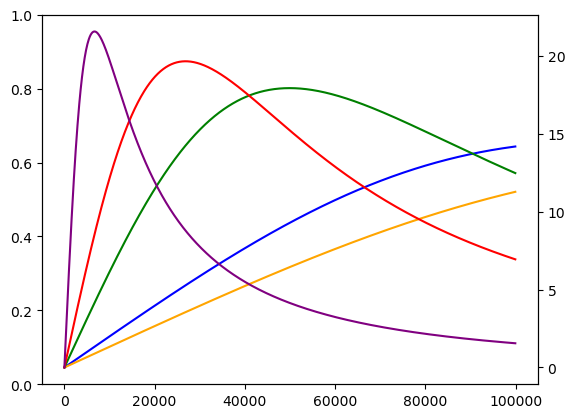

c) Observe a função que criamos na célula abaixo. É a mesma que você usou nas aulas 10 e 11.

In [141]:
def CapS():
    Z=np.array([[R1+XL+XC, -XM],[-XM, XL+R2+XC+Rc]])
    V=np.array([Uf,0])
    i=np.dot(linalg.inv(Z),V)
    return i[0], i[1]



def CapP():
    Z=np.array([[R1+XL+XC, -XM],[-XM, XL+R2+((XC*Rc)/(XC+Rc))]])
    V=np.array([Uf,0])
    i=np.dot(linalg.inv(Z),V)
    return i[0], i[1]

def Rpelicular(R, f):
    return R + (R/(100e3))*f

d) Agora calcule as correntes $i_1$ e $i_2$ para as duas condições de carga. Assim que calcular as correntes, calcule também $V_2$.

IMPORTANTE: para calcular as relações $N_1/N_2$, $V_1/V_2$ e $i_2/i_1$, você precisará usar o módulo dos fasores. Para calcular o módulo de um número complexo, use "np.abs(número complexo)".

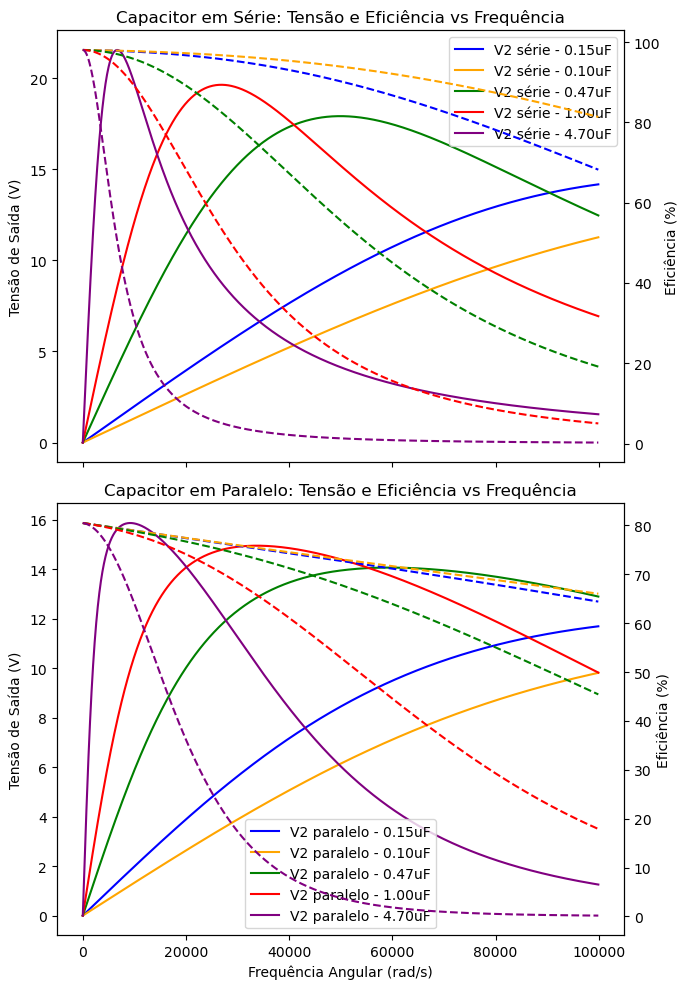

In [143]:
freq_angular = np.arange(1,100e3-10,100) 
Uf=(2/pi)*10
fig, (ax_s, ax_p) = plt.subplots(2, 1, figsize=(7, 10), sharex=True)

# Eixos duplos
ax_s2 = ax_s.twinx()
ax_p2 = ax_p.twinx()
K=0.3
capacitores_lab=[150e-9, 0.1e-6, 0.47e-6, 1e-6, 4.7e-6]
Rc=10

colors= {
    150e-9 : 'blue',
    0.1e-6 : 'orange',
    0.47e-6 : 'green',
    1e-6 : 'red',
    4.7e-6 : 'purple'
}



for c in capacitores_lab:
    v2_serieL=[]
    v2_paraleloL=[]

    eficiencia_paraleloL=[]
    eficienci_serieL=[]
    for f in freq_angular:
        w= 2*pi*f
        L=1/((w**2)*c)
        M= K*((L**2)**(1/2))
    
        XC= -1j/(w*c)
        XL = w*L*1j
        XM = w*M*1j
        Zeq=(Rc*XC)/(Rc+XC)
        Rf = Rpelicular(0.2, f)
        R1=Rf
        R2=R1
    
        i1_serie,i2_serie = CapS()
        i1_paralelo, i2_paralelo = CapP()
    
        
        V2_serie = (Rc*i2_serie)
        v2_serieL.append(abs(V2_serie))
        
        V2_paralelo = abs(i2_paralelo*(Zeq))
        v2_paraleloL.append(V2_paralelo)
        
        
        S1_serie = (Uf * (i1_serie.conjugate()))/2
        S2_serie= (V2_serie*(i2_serie.conjugate())) /2
        
        eficiencia_serie = np.abs(S2_serie.real/S1_serie.real)*100
        eficienci_serieL.append(eficiencia_serie)
        

    
        S1_paralelo = (Uf.conjugate()* i1_paralelo.conjugate())/2
        S2_paralelo = (V2_paralelo.conjugate()*V2_paralelo.conjugate())/(2*Rc)
        eficiencia_paralelo = np.abs(S2_paralelo.real/S1_paralelo.real)*100

        eficiencia_paraleloL.append(eficiencia_paralelo)

    # Gráfico série
    ax_s.plot(freq_angular, v2_serieL, label=f"V2 série - {c*1e6:.2f}uF", color=colors[c])
    ax_s2.plot(freq_angular, eficienci_serieL, '--', color=colors[c])

    # Gráfico paralelo
    ax_p.plot(freq_angular, v2_paraleloL, label=f"V2 paralelo - {c*1e6:.2f}uF", color=colors[c])
    ax_p2.plot(freq_angular, eficiencia_paraleloL, '--', color=colors[c])

# Títulos e legendas
ax_s.set_title("Capacitor em Série: Tensão e Eficiência vs Frequência")
ax_p.set_title("Capacitor em Paralelo: Tensão e Eficiência vs Frequência")

ax_s.set_ylabel("Tensão de Saída (V)")
ax_s2.set_ylabel("Eficiência (%)")
ax_p.set_ylabel("Tensão de Saída (V)")
ax_p2.set_ylabel("Eficiência (%)")
ax_p.set_xlabel("Frequência Angular (rad/s)")

ax_s.legend()
ax_p.legend()

plt.tight_layout()
plt.show()